# Inaugural Project

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
#%load_ext autoreload
#%autoreload 2

# Importing our own code
import inauguralproject as ip

# Question 1

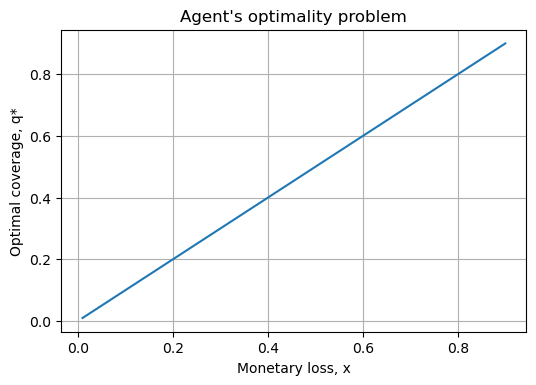

In [3]:
# Agent's assets are initialized, y
y=1

# Create array of possible monetary losses, x
N = 100
x_vec = np.linspace(0.01, 0.9, N)

# Solving the agent's optimality problem using scipy's optimize.minimize tool
q_guess = [0] 
q_opti = []

for x in x_vec:
    obj_function = lambda q: -ip.expected_utility(q[0], x)
    res = optimize.minimize(obj_function, q_guess, method = 'Nelder-Mead')
    q_opti.append(res.x[0])
    
# Plotting the optimal coverage
fig = plt.figure(dpi = 100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_vec, q_opti)
plt.title("Agent's optimality problem")
plt.xlabel('Monetary loss, x')
plt.ylabel('Optimal coverage, q*')
plt.grid()

The solution suggests that the optimal coverage (q*) approximately equals the monetary loss (x)

# Question 2

The utility function, $u(z)$, is an CRRA utility function where:

$u'(z)=z^\theta > 0 \text{ when } \theta=-2$

$u''(z)=\theta z^{\theta-1} < 0 \text{ when } \theta=-2$

We therefore expect the agent's indifferent curves to be increasing with a decreasing slope.

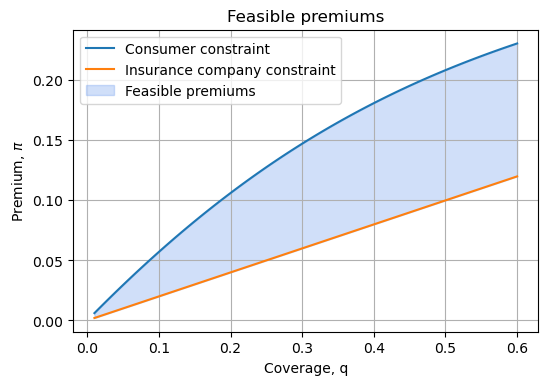

In [4]:
# Constructing a grid of q
q_vec = np.linspace(0.01, 0.6, N)

# Solving the agent's optimality problem using scipy's optimize.root tool
pi_opti = []
pi_guess = [0]

for q in q_vec:
    obj_function_pi = lambda pi: -ip.indifferent(q, pi[0])
    res = optimize.root(obj_function_pi, pi_guess, method='broyden1')
    pi_opti.append(res.x[0])
    
# Plotting the feasible premiums
fig = plt.figure(dpi = 100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(q_vec, pi_opti)
ax.plot(q_vec, q_vec*0.2)
plt.title("Feasible premiums")
plt.xlabel('Coverage, q')
plt.ylabel('Premium, $\pi$')
plt.fill_between(q_vec, pi_opti, q_vec*0.2, 
                 color='cornflowerblue', alpha=0.3,
                 label='Feasible premiums')
plt.legend(['Consumer constraint', 'Insurance company constraint', 'Feasible premiums'])
plt.grid()

# Question 3

In [5]:
np.random.seed(2000)

# The agent's expected utility for insurance policy (gamma,pi) = (0.9,0.2)
insurance_policy1 = ip.expected_utility_MC(gamma=0.9, pi=0.2)
print(f'V(0.9,0.2) = {insurance_policy1:.4f}')

# The agent's expected utility for insurance policy (gamma,pi) = (0.45,0.1)
insurance_policy2 = ip.expected_utility_MC(gamma=0.45, pi=0.1)
print(f'V(0.45,0.1) = {insurance_policy2:.4f}')

V(0.9,0.2) = -1.2861
V(0.45,0.1) = -1.2980


The agent prefers the insurance policy (gamma,pi) = (0.9,0.2) as this policy gives a relatively higher expected utility.

# Question 4

In [6]:
# The insurance company's profit maximizing premium is calculated using scipy's optimize.root tool
pi_guess = [0.4]

obj_function_mod = lambda pi: ip.indifferent_MC(pi[0], gamma=0.95)
res = optimize.root(obj_function_mod, pi_guess, method='broyden1')
pi_profitmax = res.x[0]

# The agent's expected utility given the profit maximizing premium, pi_profitmax
V_mod = ip.expected_utility_MC(gamma=0.95, pi=pi_profitmax)

print(f'The agents expected utility is {V_mod:.4f} given the profit maximizing premium = {pi_profitmax:.4f}')

/Users/emmavorregaard/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/nonlin.py:1016: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)


The agents expected utility is -1.3335 given the profit maximizing premium = 0.2389
